In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("2017_2022_PL_Standings.csv", encoding='latin')

In [3]:
df.head()

,Year_End,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2018,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070,Sergio Agüero - 21,Ederson,? Champions League via league finish
1,2018,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976,Romelu Lukaku - 16,David de Gea,? Champions League via league finish
2,2018,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953,Harry Kane - 30,Hugo Lloris,? Champions League via league finish
3,2018,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049,Mohamed Salah - 32,"Loris Karius, Simon Mignolet",? Champions League via league finish
4,2018,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282,Eden Hazard - 12,Thibaut Courtois,? Europa League via cup win 1


In [4]:
# Drop columns not needed
df = df.drop(columns=["Top Team Scorer", "Goalkeeper","Notes"])
df

,Year_End,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2018,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070
1,2018,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976
2,2018,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953
3,2018,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049
4,2018,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022,16,Everton,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446
96,2022,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308
97,2022,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278
98,2022,19,Watford,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614


In [5]:
y=df.Rk
x=df.xGD.values.reshape(-1,1)

In [6]:
x.shape

(100, 1)

In [7]:
y.shape

(100,)

In [8]:
model = LinearRegression().fit(x,y)

In [9]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

In [10]:
y_pred = intercept + slope*x

Text(0, 0.5, 'Final League Rank')

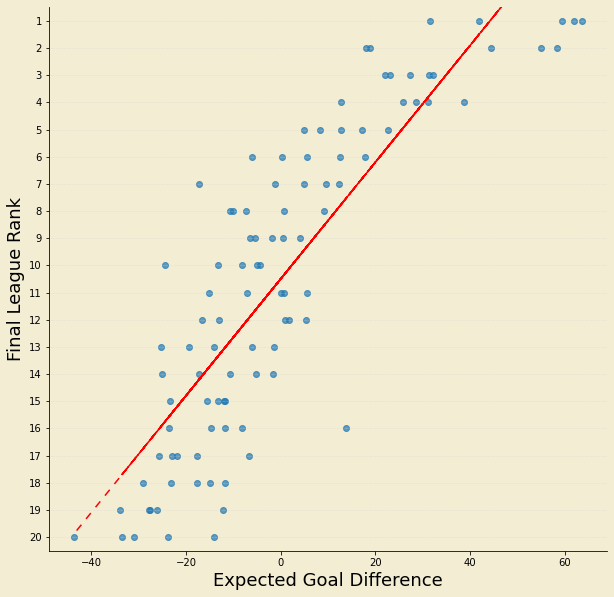

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#f3edd3')
ax.patch.set_facecolor('#f3edd3')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','right']
for i in spines:
    if i in spines:
        ax.spines[i].set_visible(False)

#plot data
plt.scatter(x,y,alpha=.7)
plt.plot(x,y_pred,c='red',linestyle='--',dashes=(5,5))


plt.ylim(.5,20.5)
plt.gca().invert_yaxis()

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Expected Goal Difference',fontsize=18)
plt.ylabel('Final League Rank',fontsize=18)

In [13]:
print(model.coef_)
print(model.intercept_)
print(r_sq)

[-0.21465517]
10.500429310339564
0.728149070668735
